In [67]:
# Libraries and utilities

# RENINDER: FARE FIT.TRANSFORM SOLO SU TRAINING E DOPO SUL TEST SOLO .TRANSFORM
# REMINDER: NORMALIZZARE PRIMA DI FARE TUTTO IL PREPROCESSING 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

In [68]:
df_train=pd.read_csv("./Dataset_prepared/Prepared_train.csv")
df_test=pd.read_csv("./Dataset_prepared/Prepared_test.csv")


In [69]:
df_train.drop('actor',axis=1,inplace=True)
df_train.drop('filename',axis=1,inplace=True)
#df_train.drop('Unnamed: 0',axis=1,inplace=True)


df_test.drop('actor',axis=1,inplace=True)
df_test.drop('filename',axis=1,inplace=True)
#df_test.drop('Unnamed: 0',axis=1,inplace=True)






In [70]:
df_train.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,...,sc_skew_w4,stft_sum_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,M,9.150000e-07,-0.000031,0.0,0.0,...,-4.175609,740.409892,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,6.742190,-1.706215
1,speech,neutral,normal,Kids are talking by the door,2nd,M,7.137790e-07,-0.000031,0.0,0.0,...,-1.100390,705.975006,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,-0.700420,-0.201495
2,speech,neutral,normal,Dogs are sitting by the door,1st,M,9.554485e-07,0.000000,0.0,0.0,...,-3.120218,694.365924,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.688986,-1.024773
3,speech,neutral,normal,Dogs are sitting by the door,2nd,M,9.176213e-07,-0.000031,0.0,0.0,...,-0.880988,663.205667,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,-0.594111,-0.412871
4,speech,calm,normal,Kids are talking by the door,1st,M,8.108948e-07,-0.000031,0.0,0.0,...,-1.071109,741.412796,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,0.126535,-0.620782


VERIFICHIAMO I VALORI DI EMOTIONAL INTENSITY NEL TRAINING

In [71]:
df_train['emotional_intensity'].value_counts()

normal    984
strong    844
Name: emotional_intensity, dtype: int64

<AxesSubplot:xlabel='emotional_intensity', ylabel='count'>

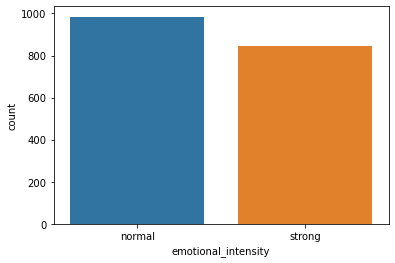

In [72]:
sns.countplot(data=df_train,x='emotional_intensity')

PROVO A SBILANCIARE

In [73]:
df_copy_train = df_train.copy()
#df_copy_train.drop('emotional_intensity',axis=1,inplace=True)

In [74]:
# Selezioniamo solo il 10% dei valori "strong"
#strong = df_train.loc[df_train['emotional_intensity'] == 'strong'].sample(frac=0.9)
#strong 
indexNames = df_train[ df_train['emotional_intensity'] == 'strong' ].sample(frac=0.9).index
df_copy_train.drop(indexNames,axis=0,inplace=True)






# Uniamo i dati selezionati con il restante 90% dei valori "normal"
#df_copy_train = pd.concat([df_train.loc[df_train['emotional_intensity'] == 'normal'], strong])



In [75]:
# Stampa della nuova proporzione di valori

print(df_copy_train['emotional_intensity'].value_counts(normalize=True))


normal    0.921348
strong    0.078652
Name: emotional_intensity, dtype: float64


In [76]:
df_copy_train['emotional_intensity'].value_counts()

normal    984
strong     84
Name: emotional_intensity, dtype: int64

<AxesSubplot:xlabel='emotional_intensity', ylabel='count'>

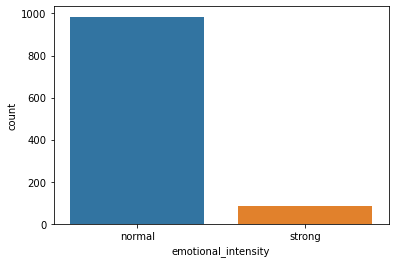

In [77]:
sns.countplot(data=df_copy_train,x='emotional_intensity')

In [78]:
df_copy_train.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,...,sc_skew_w4,stft_sum_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,M,9.150000e-07,-0.000031,0.0,0.0,...,-4.175609,740.409892,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,6.742190,-1.706215
1,speech,neutral,normal,Kids are talking by the door,2nd,M,7.137790e-07,-0.000031,0.0,0.0,...,-1.100390,705.975006,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,-0.700420,-0.201495
2,speech,neutral,normal,Dogs are sitting by the door,1st,M,9.554485e-07,0.000000,0.0,0.0,...,-3.120218,694.365924,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.688986,-1.024773
3,speech,neutral,normal,Dogs are sitting by the door,2nd,M,9.176213e-07,-0.000031,0.0,0.0,...,-0.880988,663.205667,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,-0.594111,-0.412871
4,speech,calm,normal,Kids are talking by the door,1st,M,8.108948e-07,-0.000031,0.0,0.0,...,-1.071109,741.412796,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,0.126535,-0.620782


In [79]:
df_copy_train.shape

(1068, 259)

VERIFICHIAMO I VALORI DI EMOTIONAL INTENSITY NEL TEST E SBILANCIAMO


In [80]:
df_test['emotional_intensity'].value_counts()

normal    336
strong    288
Name: emotional_intensity, dtype: int64

<AxesSubplot:xlabel='emotional_intensity', ylabel='count'>

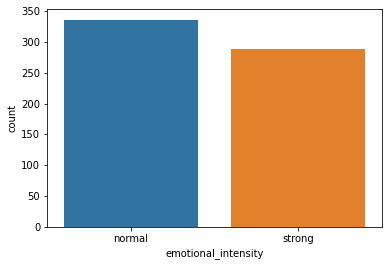

In [81]:
sns.countplot(data=df_test,x='emotional_intensity')

In [82]:
df_copy_test = df_test.copy()


In [83]:
# Selezioniamo solo il 10% dei valori "strong"
#strong = df_train.loc[df_train['emotional_intensity'] == 'strong'].sample(frac=0.9)
#strong 
indexNames = df_test[ df_test['emotional_intensity'] == 'strong' ].sample(frac=0.9).index
df_copy_test.drop(indexNames,axis=0,inplace=True)




In [84]:
# Stampa della nuova proporzione di valori

print(df_copy_test['emotional_intensity'].value_counts(normalize=True))


normal    0.920548
strong    0.079452
Name: emotional_intensity, dtype: float64


In [85]:
df_copy_test['emotional_intensity'].value_counts()

normal    336
strong     29
Name: emotional_intensity, dtype: int64

In [86]:
# Stampa della nuova proporzione di valori

print(df_copy_test['emotional_intensity'].value_counts(normalize=True))


normal    0.920548
strong    0.079452
Name: emotional_intensity, dtype: float64


In [87]:
df_copy_test['emotional_intensity'].value_counts()

normal    336
strong     29
Name: emotional_intensity, dtype: int64

<AxesSubplot:xlabel='emotional_intensity', ylabel='count'>

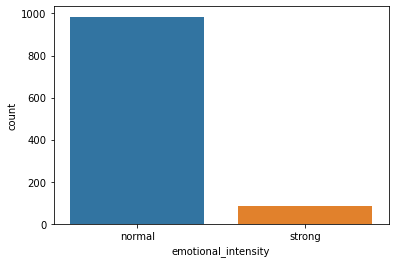

In [88]:
sns.countplot(data=df_copy_train,x='emotional_intensity')

LABEL ENCODING  TRAINING

In [89]:
c=df_copy_train.select_dtypes(include=['object']).columns.tolist()
c

['vocal_channel',
 'emotion',
 'emotional_intensity',
 'statement',
 'repetition',
 'sex']

In [90]:
cat_var=["statement","repetition","sex","emotional_intensity","vocal_channel"]
le=preprocessing.LabelEncoder()
for i in cat_var:
    df_copy_train[i]=le.fit_transform(df_copy_train[i])
categorical_col = ["emotion"]

df_copy_train = pd.get_dummies(df_copy_train, columns=categorical_col)    

df_copy_train.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,kur,...,stft_kur_w4,stft_skew_w4,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,0,1,0,1,9.150000e-07,-0.000031,0.0,0.0,15.028520,...,6.742190,-1.706215,0,0,0,0,0,1,0,0
1,1,0,1,1,1,7.137790e-07,-0.000031,0.0,0.0,16.488415,...,-0.700420,-0.201495,0,0,0,0,0,1,0,0
2,1,0,0,0,1,9.554485e-07,0.000000,0.0,0.0,17.035218,...,1.688986,-1.024773,0,0,0,0,0,1,0,0
3,1,0,0,1,1,9.176213e-07,-0.000031,0.0,0.0,21.824521,...,-0.594111,-0.412871,0,0,0,0,0,1,0,0
4,1,0,1,0,1,8.108948e-07,-0.000031,0.0,0.0,13.236022,...,0.126535,-0.620782,0,1,0,0,0,0,0,0


INTRODUCO LE LIBRERIE DI UNDER/OVER + DIM_RED

In [91]:

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

from collections import Counter
from sklearn.decomposition import PCA




NORMALIZZAZIONE TRAINING

In [92]:
numeric_features = [n for n in df_copy_train.columns if n!="emotion_angry" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex" and   n!="emotion_calm" and  n!="emotion_disgust" and  n!="emotion_fearful" and  n!="emotion_happy" and  n!="emotion_neutral" and n!="emotion_sad" and  n!="emotion_surprised"]

scaler = RobustScaler()
scaled_features = scaler.fit_transform(df_copy_train[numeric_features])
df_copy_train[numeric_features] = scaled_features
df_copy_train.head()


col = [x for x in df_copy_train.columns if x!='emotional_intensity']
X_train=df_copy_train[col].values
y_train = np.array(df_copy_train["emotional_intensity"])






NORMALIZZAZIONE + LABEL ENCODING + HOLDOUT TEST

In [93]:
for i in cat_var:
    df_copy_test[i]=le.fit_transform(df_copy_test[i])
categorical_col = ["emotion"]

df_copy_test = pd.get_dummies(df_copy_test, columns=categorical_col)    

df_copy_test.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,kur,...,stft_kur_w4,stft_skew_w4,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,0,1,0,1,2.940224e-06,-0.000092,0.0,0.000153,11.392131,...,-0.260279,-0.566556,0,0,0,0,0,1,0,0
1,1,0,1,1,1,7.733752e-07,-0.000122,0.0,0.000153,13.621589,...,-0.428900,-0.587210,0,0,0,0,0,1,0,0
2,1,0,0,0,1,-3.741909e-06,-0.000061,0.0,0.000092,7.678162,...,0.626916,-0.883317,0,0,0,0,0,1,0,0
3,1,0,0,1,1,-5.069646e-07,-0.000092,0.0,0.000122,14.511231,...,-0.825144,-0.383701,0,0,0,0,0,1,0,0
4,1,0,1,0,1,8.640319e-07,-0.000061,0.0,0.000122,8.944732,...,-0.536669,-0.547354,0,1,0,0,0,0,0,0


In [94]:
scaled_features = scaler.transform(df_copy_test[numeric_features])
df_copy_test[numeric_features] = scaled_features
df_copy_test.head()


col = [x for x in df_copy_train.columns if x!='emotional_intensity']
X_test=df_copy_test[col].values
y_test = np.array(df_copy_test["emotional_intensity"])


ISTANZIO LA GRID SEARCH PER IL KNN E IL DT 

In [95]:
param_grid = {'max_depth': [None, 2, 5, 10, 15, 20],
              'min_samples_split': [2, 5, 10, 15, 20],
              'min_samples_leaf': [1, 5, 10, 15, 20]
}

grid = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=StratifiedKFold(), # with no parameters it is with 5 split and 10 repetitions
    refit=True,
    scoring="f1_macro"
)
grid.fit(X_train, y_train)
clf = grid.best_estimator_

In [96]:
print(grid.best_params_)

{'max_depth': None, 'min_samples_leaf': 20, 'min_samples_split': 2}


In [97]:
param_grid = {
    "n_neighbors": np.arange(2,51),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "cityblock","minkowski"], # cityblock is the manhattan distance
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=StratifiedKFold(), # with no parameters it is with 5 split and 10 repetitions
    refit=True,
    scoring="f1_macro"
)

grid.fit(X_train, y_train)
clf = grid.best_estimator_

In [98]:
print(grid.best_params_)

{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}


RISULTATI NORMALI

In [99]:
learner_KNN = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
classifier = learner_KNN.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print(classification_report(y_test,predictions))
#learner_DT= DecisionTreeClassifier(max_depth=5,min_samples_leaf=1,min_samples_split=20)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       336
           1       0.10      0.03      0.05        29

    accuracy                           0.90       365
   macro avg       0.51      0.50      0.50       365
weighted avg       0.86      0.90      0.88       365



In [100]:
learner_DT= DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
classifier = learner_DT.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       336
           1       0.42      0.28      0.33        29

    accuracy                           0.91       365
   macro avg       0.68      0.62      0.64       365
weighted avg       0.90      0.91      0.90       365



DECISION THRESHOLD

In [138]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [140]:
clf = DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
clf.fit(X_train, y_train)

def adjusted_predict(X, thr=0.5):
    y_score = clf.predict_proba(X_test)[:, 1]
    return np.array([1 if y > thr else 0 for y in y_score])

y_pred = adjusted_predict(X_test, thr=0.9)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, thr = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)


Accuracy 0.9287671232876712
F1-score [0.96264368 0.23529412]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       336
           1       0.80      0.14      0.24        29

    accuracy                           0.93       365
   macro avg       0.87      0.57      0.60       365
weighted avg       0.92      0.93      0.90       365



IMBALANCE

Random Undersampling

In [101]:
# Random Undersampler
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 84, 1: 84})


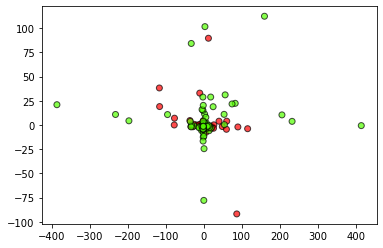

In [102]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [103]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85       336
           1       0.15      0.45      0.22        29

    accuracy                           0.75       365
   macro avg       0.55      0.61      0.54       365
weighted avg       0.88      0.75      0.80       365



In [104]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.65      0.77       336
           1       0.13      0.62      0.22        29

    accuracy                           0.65       365
   macro avg       0.54      0.64      0.50       365
weighted avg       0.89      0.65      0.73       365



Condensed nearest neighbour

In [105]:
import warnings
warnings.simplefilter("ignore")

cnn = CondensedNearestNeighbour(random_state=42, n_jobs = -1)
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 178, 1: 84})


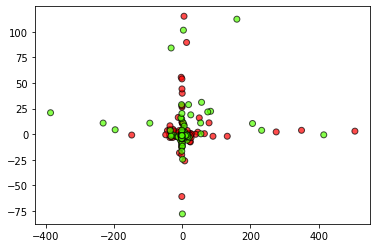

In [106]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [107]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       336
           1       0.20      0.31      0.25        29

    accuracy                           0.85       365
   macro avg       0.57      0.60      0.58       365
weighted avg       0.88      0.85      0.86       365



In [108]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       336
           1       0.18      0.52      0.27        29

    accuracy                           0.78       365
   macro avg       0.57      0.66      0.57       365
weighted avg       0.89      0.78      0.82       365



Tomek Links

In [109]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 972, 1: 84})


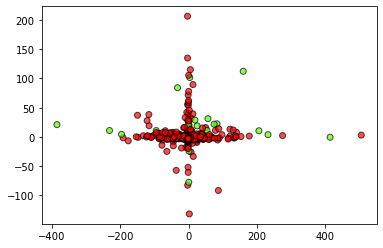

In [110]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [111]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       336
           1       0.14      0.07      0.09        29

    accuracy                           0.89       365
   macro avg       0.53      0.52      0.52       365
weighted avg       0.86      0.89      0.88       365



In [112]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       336
           1       0.33      0.17      0.23        29

    accuracy                           0.91       365
   macro avg       0.63      0.57      0.59       365
weighted avg       0.88      0.91      0.89       365



Edited Nearest Neighbour

In [113]:
enn = EditedNearestNeighbours()
X_res, y_res = enn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 879, 1: 84})


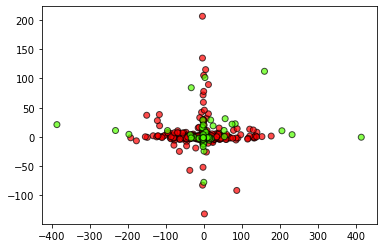

In [114]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [115]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       336
           1       0.17      0.14      0.15        29

    accuracy                           0.88       365
   macro avg       0.55      0.54      0.54       365
weighted avg       0.87      0.88      0.87       365



In [116]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       336
           1       0.36      0.17      0.23        29

    accuracy                           0.91       365
   macro avg       0.64      0.57      0.59       365
weighted avg       0.89      0.91      0.89       365



Cluster Centroids

In [117]:
from sklearn.cluster import KMeans
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(
    estimator=KMeans(n_init=1, random_state=0), random_state=42 # minibatch version is faster than Kmeans
)
X_res, y_res = cc.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 84, 1: 84})


In [118]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       336
           1       0.20      0.31      0.24        29

    accuracy                           0.85       365
   macro avg       0.57      0.60      0.58       365
weighted avg       0.88      0.85      0.86       365



In [119]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.30      0.46       336
           1       0.09      0.79      0.16        29

    accuracy                           0.34       365
   macro avg       0.52      0.55      0.31       365
weighted avg       0.88      0.34      0.43       365



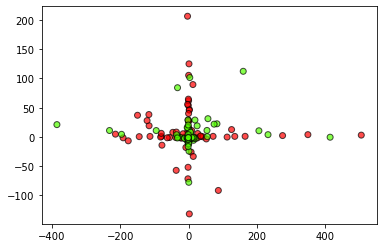

In [120]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

# Esperimento 2: Oversampling + Dim.Reduction + New classification with tuned hyperparameters

Random oversampler

In [121]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 984, 1: 984})


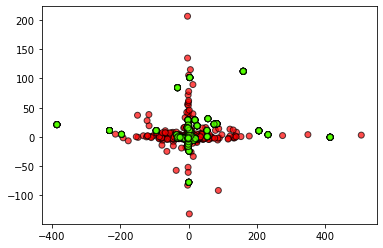

In [122]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [123]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       336
           1       0.10      0.03      0.05        29

    accuracy                           0.90       365
   macro avg       0.51      0.50      0.50       365
weighted avg       0.86      0.90      0.88       365



In [124]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       336
           1       0.31      0.28      0.29        29

    accuracy                           0.89       365
   macro avg       0.62      0.61      0.62       365
weighted avg       0.89      0.89      0.89       365



smote

In [125]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 984, 1: 984})


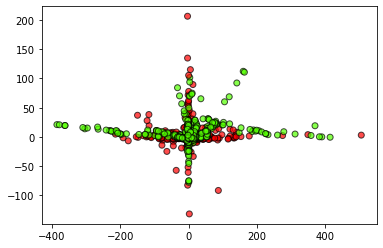

In [126]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [127]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       336
           1       0.14      0.34      0.20        29

    accuracy                           0.78       365
   macro avg       0.54      0.58      0.53       365
weighted avg       0.87      0.78      0.82       365



In [128]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       336
           1       0.23      0.38      0.29        29

    accuracy                           0.85       365
   macro avg       0.59      0.64      0.60       365
weighted avg       0.89      0.85      0.87       365



adasyn

In [129]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 984, 1: 979})


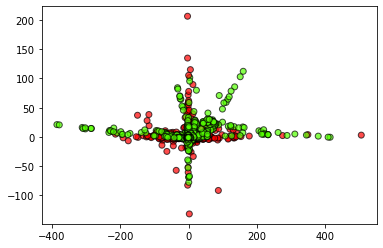

In [130]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [131]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86       336
           1       0.11      0.28      0.16        29

    accuracy                           0.76       365
   macro avg       0.52      0.54      0.51       365
weighted avg       0.86      0.76      0.81       365



In [132]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       336
           1       0.18      0.38      0.24        29

    accuracy                           0.81       365
   macro avg       0.56      0.62      0.57       365
weighted avg       0.88      0.81      0.84       365



# Dimensionality Reduction

In [133]:
from sklearn.feature_selection import VarianceThreshold

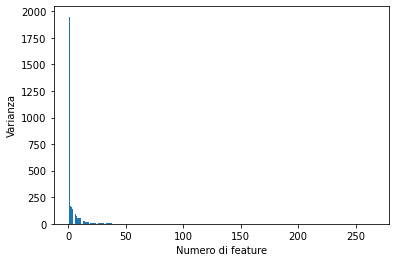

In [146]:
# Calcola la varianza di ciascuna feature di X
variances = np.var(X_train, axis=0)

# Ordina le varianze in ordine decrescente
variances_sorted = np.sort(variances)[::-1]

# Crea un array con il numero di feature considerate (da 1 a N)
n_features = np.arange(1, len(variances)+1 )

# Crea un istogramma delle varianze al variare del numero di feature considerate
plt.bar(n_features, variances_sorted)
plt.xlabel('Numero di feature')
plt.ylabel('Varianza')
plt.show()

In [147]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_train_sel = sel.fit_transform(X_train)
print(f"Train new shape: {X_train_sel.shape}\nTrain original shape: {X_train.shape}")

Train new shape: (1068, 243)
Train original shape: (1068, 265)


In [148]:
X_test_sel = sel.transform(X_test)
classifier = learner_KNN.fit(X_train_sel, y_train)
predictions = classifier.predict(X_test_sel)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       336
           1       0.10      0.03      0.05        29

    accuracy                           0.90       365
   macro avg       0.51      0.50      0.50       365
weighted avg       0.86      0.90      0.88       365

